# Multiple Linear Regression

Good models require multiple regressions in order to address the higher complexity of problems.

y^ = b0 + b1x1 + b2x2 + ... + bkxk

No longer being about best fitting line. After 3 dimensions there is no visual way to represent the data.

## Adjusted R-Squared

The R-squared measures how much of the total variability is explained by our model.

Multiple regressions are always better than simple ones, as with each additional variable you add, the explanatory power may only increase or stay the same.

Adjusted R-Squared is always smaller than the R-Squared as it penalises the excessive use of variables.

## Import the relevant libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn
seaborn.set()

## Load the data

In [3]:
data = pd.read_csv('/Users/jackyaffe/Google Drive/Jack/Udemy/DataSci/The Data Science Course 2018 - All Resources/Part_5_Advanced_Statistical_Methods_(Machine_Learning)/S33_L195/1.02. Multiple linear regression.csv')

data

In [5]:
data.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


## Create your first multiple regression

In [6]:
y = data['GPA']
x1 = data[['SAT','Rand 1,2,3']]

In [7]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()

In [8]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Sun, 10 May 2020   Prob (F-statistic):           6.58e-10
Time:                        12:43:25   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Compared to the results from the simple linear regression model (previous file - S32), the r-squared seems to have increased slightly, but the adjusted r-squared seems to be worse as we are being penalised for adding a variable that doesnt have a strong explanatory power.

The P value for the Random variable is 0.762. This is incredibly high and we cannot reject the null hypothesis at this level (i.e. reject the fact that the variable has no impact on the outcome).

Random variable not only worsens the explanatory power, but it is insignificant.

When you have a variable that is not relevant you should remove it from the regression calculation as it affects the coefficients of other variables and can give worse results overall.

Simplicity in models is better rewarded than bringing in as many factors as possible. 100 variables is possible, but best to try and be able to predict with as few necessary inputs as possible.

## Basis for comparing models

They should have the same dependent variable (y)

They should be using the same dataset

## F Statistic

F-statistic is used for testing the overall significance of a model.

The null hypothesis in the F test is that all betas are zero. 

If all betas are zero, then none of the x's matter => our model has no merit.

The lower the f-statistic, the closer to a non-significant model

## OLS Assumptions

1) Linearity <br>
2) No endogeneity <br>
3) Normality and Homoscedasticity <br>
4) No Autocorrelation <br>
5) No Multicollinearity <br>

The biggest mistake you can make is to perform a regression that violates one of these assumptions.

## A1 - Linearity

The linear regression is the simplest non-trivial relationship.

It is called linear because the equation is linear.

**Fixes:** <br>
You can run a non-liner regression <br>
You can do an exponential transformation <br>
You can do a log transformation

## A2 - No Endogeneity

Prohibition between the link of the independent variables and the errors. 

This is a problem called omitted variable bias.

It happens when you forget to include a relevant variable.

Chances are the omitted variable is somewhat correlated with the error.

Omitted variable bias is hard to fix, its hard to think about what might be missing. It requires critical thinking. Can you get a better sample? Is there something missing?

When in doubt, include more variables and you can tweak down.

**Omitted variable bias:** <br>
Always different <br>
Always sneaky <br>
Only experience and advanced knowledge can help <br>
Don't hesitate to ask for a hand if you can't figure it out

## A3 - Normality and Homoscedasticity

Comprises of three parts: <br>
Normality <br>
Zero mean <br>
Homoscedasticity

Normality - assume error term is normally distributed. 
T and F tests work because we have assumed normality.


Zero mean - if mean is not expected to be zero, the line is not the best fitting one. However, having an intercept solves that problem.

Homoscedasticity - means to have equal variance. Error term should have equal varience. For some datasets, smaller values of a variable have better predictive value than larger values. 

**Prevention:** <br>
Look for OVB  (Omitted variable bias)<br>
Look for outliers <br>
Transform

**Log transformation:** <br>
Take the log of the variable <br>
Perform the regression

## A4 - No Autocorrelation

Also known as no serial correlation

It cannot be relaxed

Very common in time series data, i.e. stock data

A common way to detect autocorrelation is by looking for patterns on a graph, if there are none, you are safe.

Another way is the Durbin-Watson test, which is given as a result on the regression outputs. 

It usually falls between 0 and 4.

2 = no autocorrelation
less than 1, more than 3 = cause for alarm.

When in the presence of autocorrelation there are no fixes, you should just avoid using linear regression.

There are other types of regression that work well with time series data: <br>
- Autoregressive model
- Moving average model
- Autoregressive moving average model
- Autoregressive integrated moving average model

## A5 - No Multicollinearity

When two or more variables have a high correlation.
<br>
e.g.1

a = 2 + 5 * b <br>
b = (a - 2) / 5 <br>
Pab = 1 <br>
This is perfect multicollinearity as the two variables are dependent on each other.
If a can be represented using b, there is no point using both.

e.g.2

c,d <br>
Pc,d = 0.9 <br>
Imperfect multicollinearity. The assumption is still violated and poses a threat to the model as if c can almost be represented using d, there is no point in using both.

**Fixes:** <br>
- drop one of two variables
- transform them into one variable
- keep them both (if you are skilled and can manage it)

**Prevention:** <br>
- Find the correlation between each two pairs of independent variables

## Categorical Data

Categorical data (i.e. Yes / No data values) cannot simply be put into the regression.

Dummy variables can be used in this instance.


In [11]:
raw_data = pd.read_csv('/Users/jackyaffe/Google Drive/Jack/Udemy/DataSci/The Data Science Course 2018 - All Resources/Part_5_Advanced_Statistical_Methods_(Machine_Learning)/S33_L204/1.03. Dummies.csv')

In [12]:
raw_data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [13]:
raw_data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


Usually you would map the yes and no values with 1s and 0s.

Dummy -> imitation of categories with numbers!

In [14]:
data = raw_data.copy()

In [15]:
data['Attendance'] = data['Attendance'].map({'Yes':1,'No':0})

In [16]:
data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [17]:
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


## Regression

In [18]:
y = data['GPA']
x1 = data[['SAT','Attendance']]

In [20]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Sun, 10 May 2020   Prob (F-statistic):           2.19e-15
Time:                        13:43:13   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

You can split the lines into one for those who attended and one for those who didnt.

We have two equations that have the same slope but different intercept.

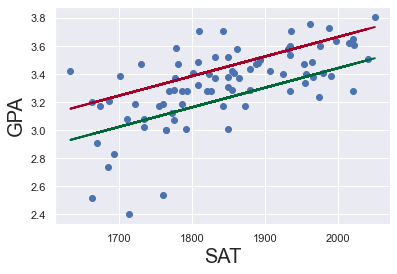

In [22]:
plt.scatter(data['SAT'],y)
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']
fig = plt.plot(data['SAT'],yhat_no,lw=2,c='#006837')
fig = plt.plot(data['SAT'],yhat_yes,lw=2,c='#a50026')
plt.xlabel('SAT',fontsize = 20)
plt.ylabel('GPA',fontsize = 20)
plt.show()

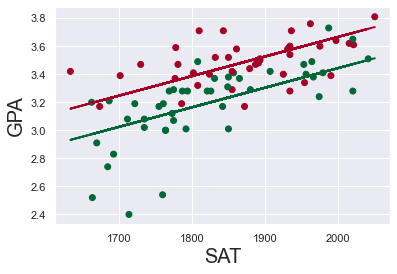

In [23]:
plt.scatter(data['SAT'],y,c=data['Attendance'],cmap='RdYlGn_r')
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']
fig = plt.plot(data['SAT'],yhat_no,lw=2,c='#006837')
fig = plt.plot(data['SAT'],yhat_yes,lw=2,c='#a50026')
plt.xlabel('SAT',fontsize = 20)
plt.ylabel('GPA',fontsize = 20)
plt.show()

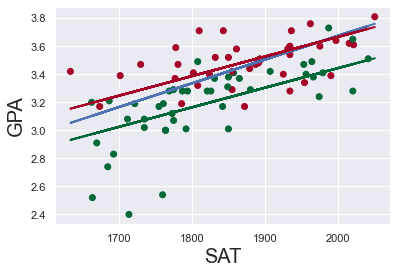

In [24]:
plt.scatter(data['SAT'],y,c=data['Attendance'],cmap='RdYlGn_r')
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']
yhat = 0.0017*data['SAT']+0.275
fig = plt.plot(data['SAT'],yhat,lw=2,c='#4C72B0',label='regression line')
fig = plt.plot(data['SAT'],yhat_no,lw=2,c='#006837',label = 'regression line1')
fig = plt.plot(data['SAT'],yhat_yes,lw=2,c='#a50026',label = 'regression line2')
plt.xlabel('SAT',fontsize = 20)
plt.ylabel('GPA',fontsize = 20)
plt.show()

## How to make predictions based on the regressions we create

In [25]:
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


In [29]:
new_data = pd.DataFrame({'const':1,'SAT':[1700,1670],'Attendance':[0,1]})
new_data = new_data[['const','SAT','Attendance']]
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [30]:
new_data.rename(index={0:'Bob',1:'Alice'})

,const,SAT,Attendance
Bob,1,1700,0
Alice,1,1670,1


In [31]:
predictions = results.predict(new_data)
predictions

0    3.023513
1    3.204163
dtype: float64

In [32]:
predictionsdf = pd.DataFrame({'Predictions':predictions})
joined = new_data.join(predictionsdf)
joined.rename(index={0:'Bob',1:'Alice'})

,const,SAT,Attendance,Predictions
Bob,1,1700,0,3.023513
Alice,1,1670,1,3.204163
